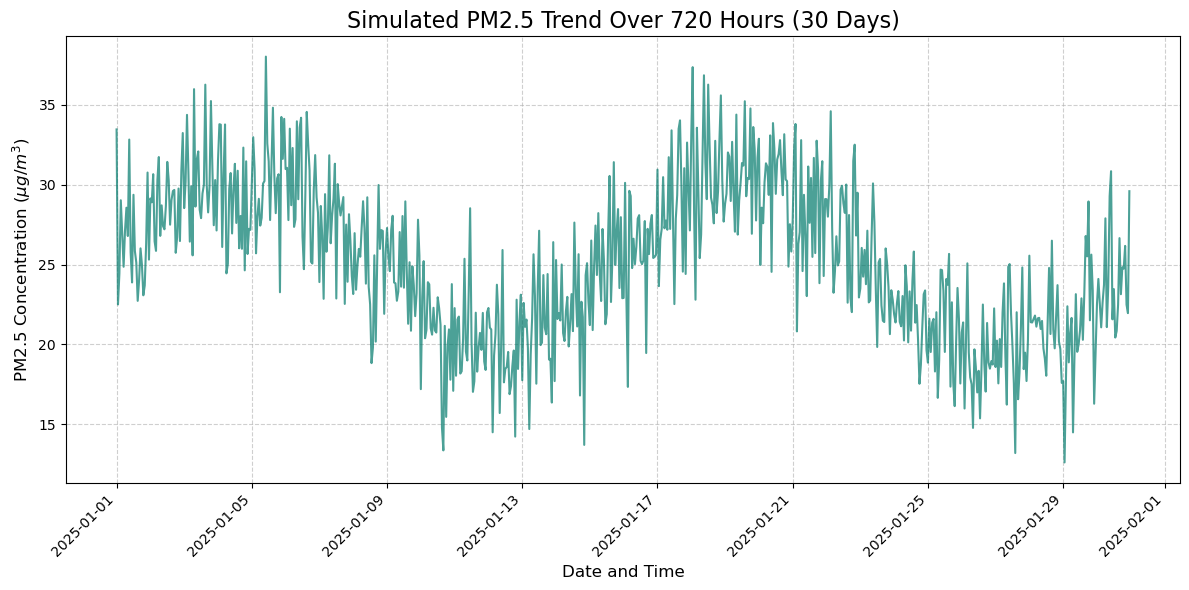

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# We add pandas, which is essential for handling large, time-indexed datasets
import pandas as pd

# --- Simulating a Large Dataset (30 days of hourly data) ---
# Total data points = 30 days * 24 hours = 720 data points
num_data_points = 720

# Create a time index representing 30 days of hourly data
start_date = '2025-01-01 00:00:00'
# FIX: Changed 'H' to 'h' to resolve the FutureWarning, as recommended by pandas.
time_index = pd.date_range(start=start_date, periods=num_data_points, freq='h')

# Simulate PM2.5 data with a base trend (e.g., lower levels overall) and some noise
# This simulates the kind of raw data your IoT sensors collect over a month
base_level = np.sin(np.linspace(0, 4 * np.pi, num_data_points)) * 5 + 25
noise = np.random.normal(0, 3, num_data_points)
pm25_levels = np.clip(base_level + noise, a_min=10, a_max=50) # Keep levels realistic

# Create a Pandas Series for easy time-series plotting
pm25_series = pd.Series(pm25_levels, index=time_index)

# --- Create the Plot using the larger dataset ---
# We make the figure wider to accommodate the dense data points
plt.figure(figsize=(12, 6))

# Plot the Pandas Series directly. Pandas handles the date formatting on the x-axis.
plt.plot(pm25_series.index, pm25_series.values, linestyle='-', color='#00796b', alpha=0.7)

# Add labels and title
plt.title(f'Simulated PM2.5 Trend Over {num_data_points} Hours (30 Days)', fontsize=16)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('PM2.5 Concentration ($\mu g/m^3$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Improve X-axis tick readability for date/time data
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjusts plot to prevent labels from overlapping

# Display the plot
plt.show()


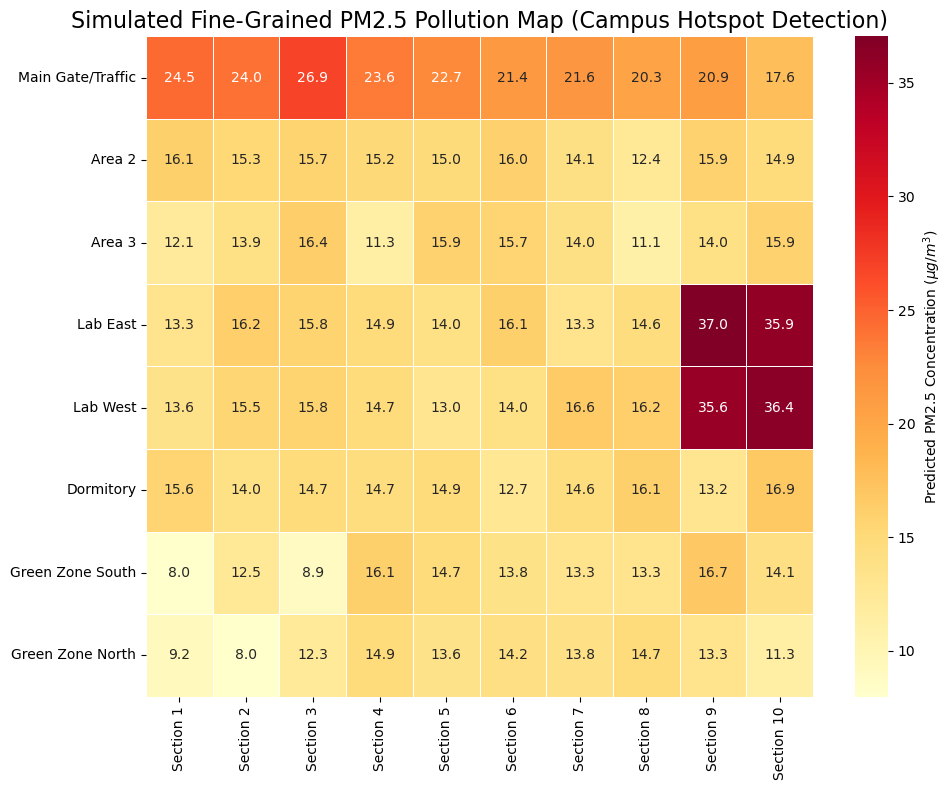

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Define the Campus Grid and Spatial Data ---

# Define the size of the simulated campus grid (e.g., 8x10 sections)
GRID_SIZE_Y = 8  # North-South (Y-axis: 0=South/Gate, 7=North/Quiet Zone)
GRID_SIZE_X = 10 # East-West (X-axis)

# Create a base matrix (e.g., average PM2.5 level)
base_pollution = np.full((GRID_SIZE_Y, GRID_SIZE_X), 15.0)

# Simulate Hotspots based on your paper's findings:
# 1. Main Gate Traffic (South end: Y=0)
base_pollution[0, :] += np.linspace(10, 5, GRID_SIZE_X) # High pollution near gate, fading slightly east/west

# 2. Science Laboratory/Emissions (Mid-campus, East side)
base_pollution[3:5, 8:10] += 20  # High spike for 2x2 lab area

# 3. Cleaner Green Zones (North-West)
base_pollution[6:8, 0:3] -= 5.0 # Cleaner air in green zones

# Add small random noise for realism
noise = np.random.normal(0, 1.5, (GRID_SIZE_Y, GRID_SIZE_X))
pollution_data = np.clip(base_pollution + noise, a_min=5, a_max=50) # Ensure values stay reasonable

# --- 2. Create Labels for Interpretation ---
row_labels = ['Main Gate/Traffic', 'Area 2', 'Area 3', 'Lab East', 'Lab West', 'Dormitory', 'Green Zone South', 'Green Zone North']
col_labels = [f'Section {i+1}' for i in range(GRID_SIZE_X)]

# Convert to DataFrame for Seaborn plotting (easier labeling)
df_pollution = pd.DataFrame(pollution_data, index=row_labels, columns=col_labels)


# --- 3. Generate the Heatmap Plot ---

plt.figure(figsize=(10, 8))

# Use Seaborn's heatmap function
sns.heatmap(
    df_pollution,
    cmap="YlOrRd", # Yellow-Orange-Red color map (good for pollution intensity)
    annot=True,    # Annotate the heatmap with the data values
    fmt=".1f",     # Format annotations to one decimal place
    linewidths=.5, # Lines between cells
    cbar_kws={'label': 'Predicted PM2.5 Concentration ($\mu g/m^3$)'}
)

# Set the final title and adjust layout
plt.title('Simulated Fine-Grained PM2.5 Pollution Map (Campus Hotspot Detection)', fontsize=16)
plt.yticks(rotation=0) # Keep Y labels horizontal
plt.tight_layout() # Automatically adjust plot parameters for tight layout

# Display the plot
plt.show()
